In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss


In [ ]:
#importing data set
data_dir="/content/drive/MyDrive/ML_DF.csv"
ML= pd.read_csv(data_dir)
ML

,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,trip_type_Street-hail,refund_neg_duplicated_True,trip_price,trip_duration,Day,Hour
0,225,220,1,0.00,2.5,0.5,999.0,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,22.0,1,0
1,43,43,1,0.81,4.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,187.0,1,1
2,79,61,1,4.97,18.0,0.5,0.5,3.86,0.0,0.3,...,0,0,0,1,1,0,high,1139.0,1,0
3,160,189,1,0.83,5.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,242.0,1,1
4,112,117,1,4.99,16.0,0.5,0.5,2.00,0.0,0.3,...,0,0,0,1,1,0,high,999.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913212,37,164,1,1.39,8.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,595.0,31,23
913213,139,108,1,2.51,11.0,0.5,0.5,1.70,0.0,0.3,...,0,0,0,1,1,0,medium,814.0,31,23
913214,105,138,1,1.00,6.5,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,367.0,31,0
913215,105,21,1,2.18,10.0,0.5,0.5,0.00,0.0,0.3,...,0,0,0,1,1,0,medium,637.0,31,23


Maximum depth of the tree: 19


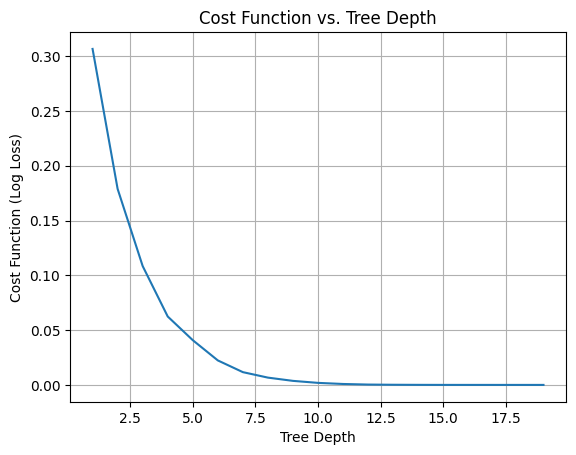

In [ ]:
#spliting data set to input and ouput
X = ML.drop(['trip_price'], axis=1)
y = ML['trip_price']
X_shuffle, y_shuffle = shuffle(X, y, random_state=42)

# Assuming 'X' contains your features and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X_shuffle, y_shuffle, test_size=0.35, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)
# Get the maximum depth of the tree
max_depth = clf.get_depth()
print(f"Maximum depth of the tree: {max_depth}")

cost_values = []
max_depths=range(1,max_depth+1)

# Train decision trees with increasing depths and record the cost
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    cost_values.append(loss)

# Plotting cost function vs. tree depth
plt.plot(max_depths, cost_values)
plt.xlabel('Tree Depth')
plt.ylabel('Cost Function (Log Loss)')
plt.title('Cost Function vs. Tree Depth')
plt.grid(True)
plt.show()
#from graph tree depth of 5 would prevent overfitting while maintaining high accuracy


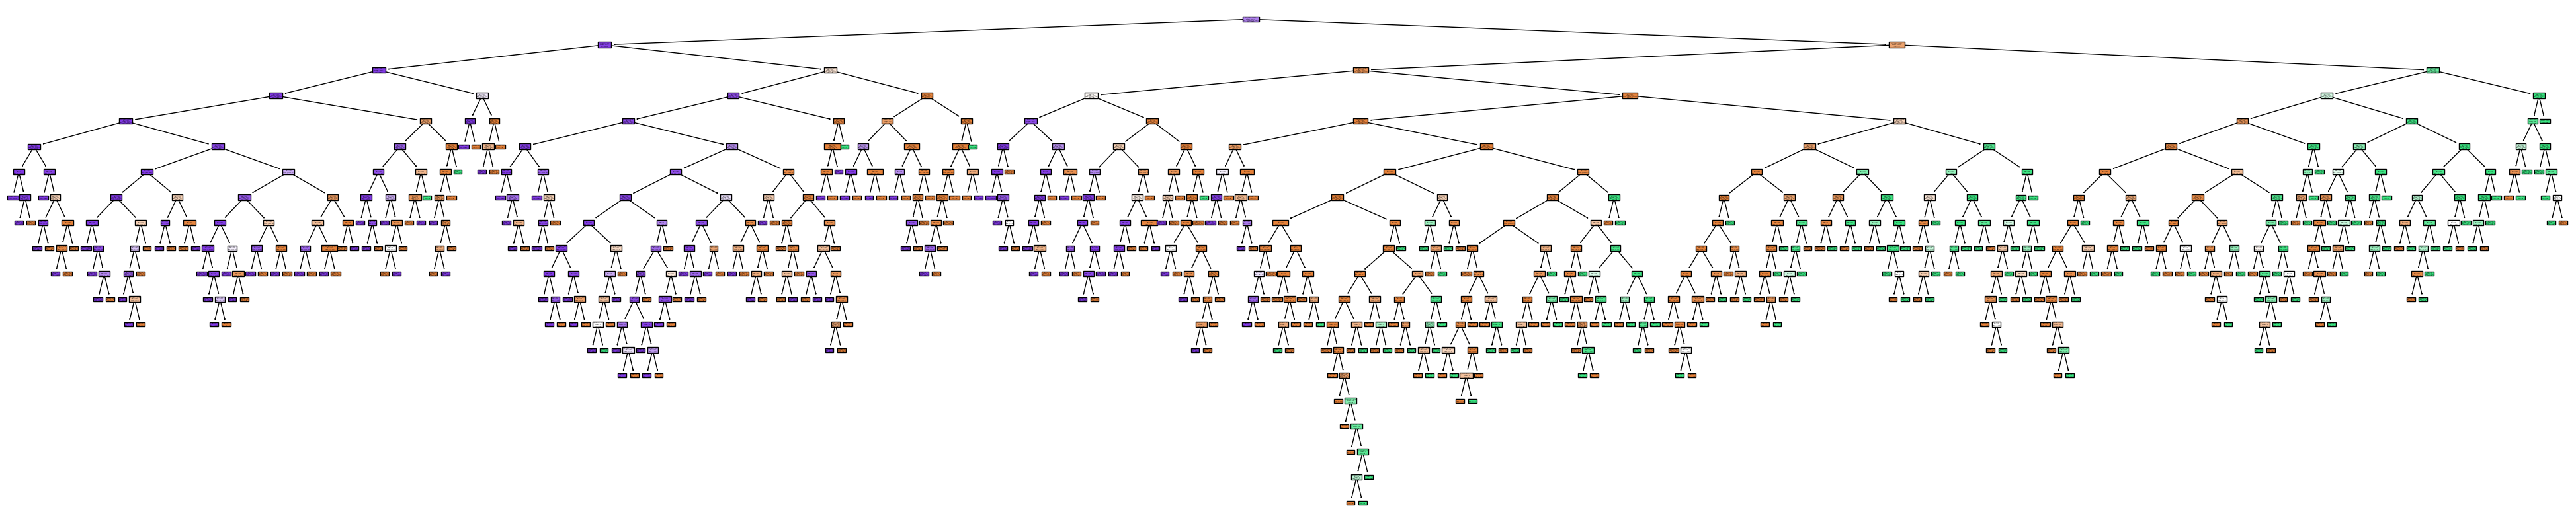

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot the decision tree
class_names = ['high', 'medium', 'low']
plt.figure(figsize=(50,10))  # Adjust the figure size as needed
plot_tree(clf, feature_names=['pu_location','do_location','passenger_count','trip_distance','fare_amount','extra','mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'payment_type', 'week_number', 'rate_type_JFK',
       'rate_type_Nassau or Westchester', 'rate_type_Negotiated fare',
       'rate_type_Newark', 'rate_type_Standard rate', 'trip_type_Street-hail',
       'refund_neg_duplicated_True', 'trip_duration', 'Day', 'Hour'], class_names=clf.classes_ , filled=True)
plt.show()

tree was overfitted before pruning

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other classification metrics
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.9877919818788209
              precision    recall  f1-score   support

        high       0.98      0.97      0.97     75466
         low       0.98      0.94      0.96     12147
      medium       0.99      1.00      0.99    232013

    accuracy                           0.99    319626
   macro avg       0.98      0.97      0.98    319626
weighted avg       0.99      0.99      0.99    319626



using elbow method choosing the best tree-depth=5


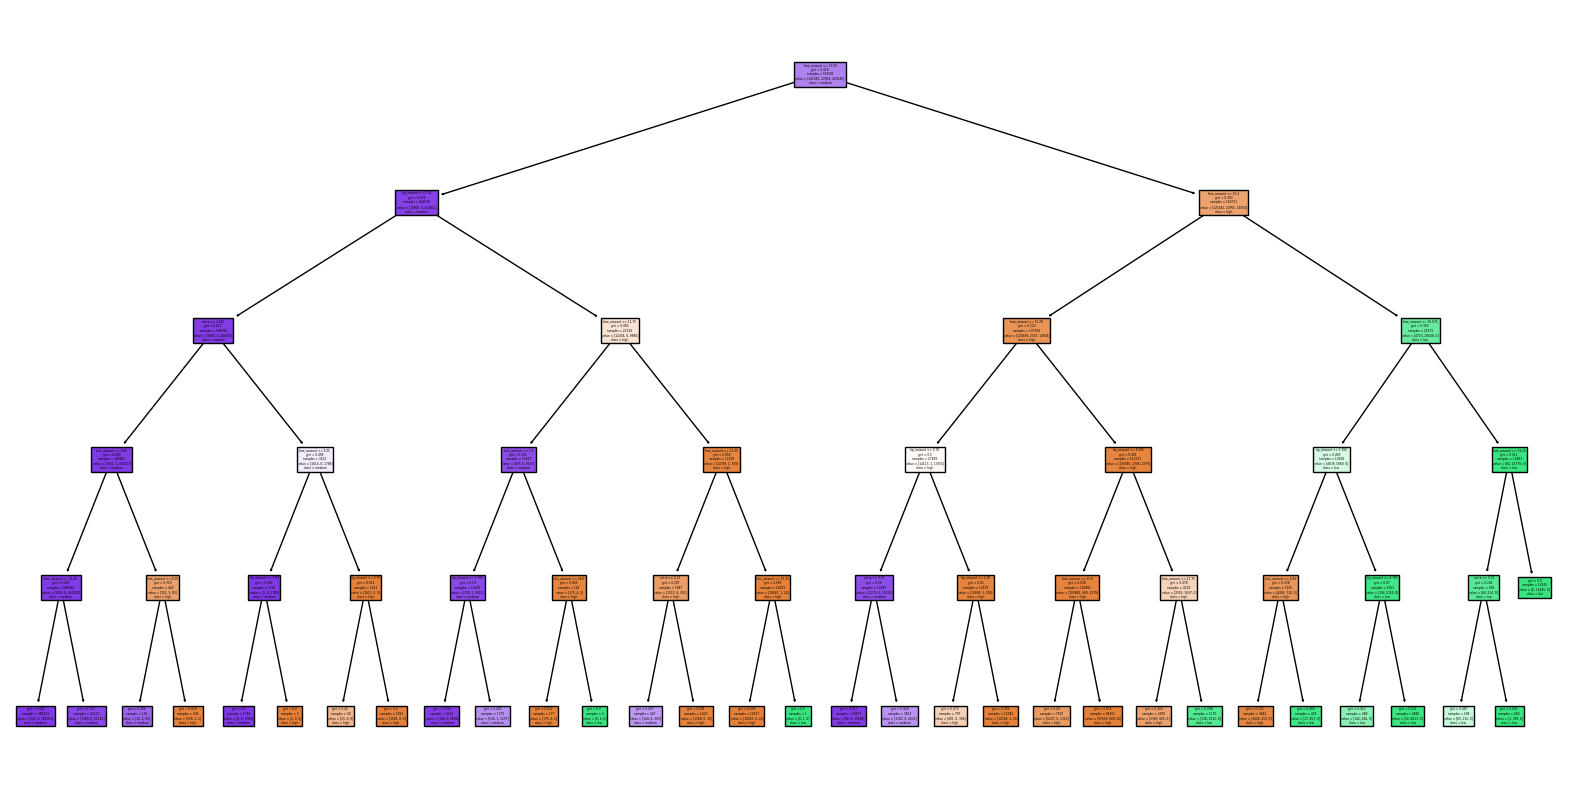

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#tree of depth 5 after constraining
# Plot the decision tree
class_names = ['high', 'medium', 'low']
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(clf, feature_names=['pu_location','do_location','passenger_count','trip_distance','fare_amount','extra','mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'payment_type', 'week_number', 'rate_type_JFK',
       'rate_type_Nassau or Westchester', 'rate_type_Negotiated fare',
       'rate_type_Newark', 'rate_type_Standard rate', 'trip_type_Street-hail',
       'refund_neg_duplicated_True', 'trip_duration', 'Day', 'Hour'], class_names=clf.classes_ , filled=True)
plt.show()

In [ ]:
# Get feature importances
feature_names=['pu_location','do_location','passenger_count','trip_distance','fare_amount','extra','mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'payment_type', 'week_number', 'rate_type_JFK',
       'rate_type_Nassau or Westchester', 'rate_type_Negotiated fare',
       'rate_type_Newark', 'rate_type_Standard rate', 'trip_type_Street-hail',
       'refund_neg_duplicated_True', 'trip_duration', 'Day', 'Hour']

feature_importances = clf.feature_importances_

# Find the index of the most important feature (the root feature)
root_feature_index = feature_importances.argmax()

# Get the name of the root feature
root_feature_name = feature_names[root_feature_index]

print("Root Feature:", root_feature_name)

Root Feature: fare_amount


Confusion Matrix for Decision Tree:
[[ 73310    223   1933]
 [   765  11381      1]
 [   980      0 231033]]


<Figure size 640x480 with 0 Axes>

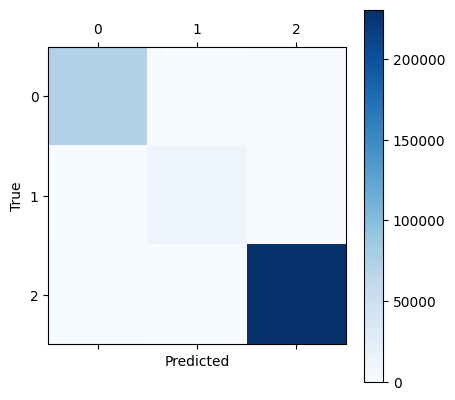

Classification Report:
               precision    recall  f1-score   support

        high       0.98      0.97      0.97     75466
         low       0.98      0.94      0.96     12147
      medium       0.99      1.00      0.99    232013

    accuracy                           0.99    319626
   macro avg       0.98      0.97      0.98    319626
weighted avg       0.99      0.99      0.99    319626



In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder
# Calculate OOB accuracy for classification
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for Decision Tree:")
print(cm)
plt.figure()
plt.matshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif



# Calculate mutual information (information gain) for each feature
mutual_info = mutual_info_classif(X_shuffle, y_shuffle)

# Create a DataFrame to display the information gain for each feature
feature_info_gain = pd.DataFrame({'Feature': X.columns, 'Information Gain': mutual_info})
feature_info_gain.sort_values(by='Information Gain', ascending=False, inplace=True)
print(feature_info_gain)

                            Feature  Information Gain
4                       fare_amount          0.579618
3                     trip_distance          0.482006
19                    trip_duration          0.415830
7                        tip_amount          0.292171
1                       do_location          0.169691
16          rate_type_Standard rate          0.109632
9             improvement_surcharge          0.100991
17            trip_type_Street-hail          0.096056
10                     payment_type          0.076030
2                   passenger_count          0.049738
5                             extra          0.035438
0                       pu_location          0.034106
8                      tolls_amount          0.031194
11                      week_number          0.024107
21                             Hour          0.009195
12                    rate_type_JFK          0.006370
6                           mta_tax          0.005656
20                          

In [ ]:
import pandas as pd
import numpy as np

#calculating entropy
def entropy(labels):
    """Calculate entropy given a list of labels."""
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy
#calculating intrinsic information
def intrinsic_information(labels):
    """Calculate the intrinsic information given a list of labels."""
    return entropy(labels)
#calculating information gain
def information_gain(parent_labels, child_labels):
    """Calculate information gain given parent and child labels."""
    parent_entropy = entropy(parent_labels)
    weighted_child_entropy = sum(len(child) / len(parent_labels) * entropy(child) for child in child_labels)
    return parent_entropy - weighted_child_entropy
#calculating gain ratio
def gain_ratio(parent_labels, child_labels):
    """Calculate gain ratio given parent and child labels."""
    ig = information_gain(parent_labels, child_labels)
    ii = intrinsic_information(parent_labels)
    return ig / ii if ii != 0 else 0  # Avoid division by zero

# Calculate gain ratio, information gain, and intrinsic information for each feature
results = {}
target = y
max_gain_ratio = -1  # Initialize max gain ratio
max_gain_ratio_feature = None  # Initialize feature with max gain ratio
for feature in X.columns[:]:  # Exclude the target column
    feature_values = ML[feature]
    # Assume binning or discretization is already done
    bins = [0, 0.5, 1]  # Example bins, you may need to adjust based on your data
    binned_feature = pd.cut(feature_values, bins=bins, labels=False)
    child_labels = [ML[binned_feature == bin_value]['trip_price'] for bin_value in range(len(bins) - 1)]
    ii = intrinsic_information(target)
    ig = information_gain(target, child_labels)
    gr = gain_ratio(target, child_labels)
    results[feature] = {'Intrinsic Information': ii, 'Information Gain': ig, 'Gain Ratio': gr}
    if gr > max_gain_ratio:
        max_gain_ratio = gr
        max_gain_ratio_feature = feature

# Display results for each feature
for feature, metrics in results.items():
    print(f"Feature: {feature}")
    print(f"Intrinsic Information: {metrics['Intrinsic Information']:.4f}")
    print(f"Information Gain: {metrics['Information Gain']:.4f}")
    print(f"Gain Ratio: {metrics['Gain Ratio']:.4f}")
    print()
#feature with max gain is that most affects the output
print(f"Feature with Max Gain Ratio: {max_gain_ratio_feature}")
print(f"Max Gain Ratio: {max_gain_ratio:.4f}")

Feature: pu_location
Intrinsic Information: 1.0100
Information Gain: 1.0090
Gain Ratio: 0.9990

Feature: do_location
Intrinsic Information: 1.0100
Information Gain: 1.0082
Gain Ratio: 0.9982

Feature: passenger_count
Intrinsic Information: 1.0100
Information Gain: 0.1693
Gain Ratio: 0.1676

Feature: trip_distance
Intrinsic Information: 1.0100
Information Gain: 0.9964
Gain Ratio: 0.9865

Feature: fare_amount
Intrinsic Information: 1.0100
Information Gain: 1.0100
Gain Ratio: 1.0000

Feature: extra
Intrinsic Information: 1.0100
Information Gain: 0.3780
Gain Ratio: 0.3743

Feature: mta_tax
Intrinsic Information: 1.0100
Information Gain: 0.0124
Gain Ratio: 0.0123

Feature: tip_amount
Intrinsic Information: 1.0100
Information Gain: 0.9866
Gain Ratio: 0.9768

Feature: tolls_amount
Intrinsic Information: 1.0100
Information Gain: 1.0100
Gain Ratio: 1.0000

Feature: improvement_surcharge
Intrinsic Information: 1.0100
Information Gain: 0.0277
Gain Ratio: 0.0274

Feature: payment_type
Intrinsic In

In [ ]:

def gini(labels):
    """Calculate Gini Index given a list of labels."""
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    gini_index = 1 - np.sum(probabilities**2)
    return gini_index

# Calculate Gini Index for each feature
gini_indices = {}
target = y
min_gini = float('inf')
min_gini_feature = None
for feature in X.columns[:]:  # Exclude the target column
    feature_values = X[feature]
    # Assume binning or discretization is already done
    bins = [0, 0.5, 1]  # Example bins, you may need to adjust based on your data
    binned_feature = pd.cut(feature_values, bins=bins, labels=False)
    unique_bins = np.unique(binned_feature)
    feature_gini = 0
    for bin_value in unique_bins:
        bin_labels = ML[binned_feature == bin_value]['trip_price']
        bin_weight = len(bin_labels) / len(ML)
        feature_gini += bin_weight * gini(bin_labels)
    gini_indices[feature] = feature_gini
    if feature_gini < min_gini:
        min_gini = feature_gini
        min_gini_feature = feature


# Display Gini Index for each feature
for feature, gini_index in gini_indices.items():
    print(f"Feature: {feature}, Gini Index: {gini_index:.4f}")
#feature with min gini index is that most affects the output

print(f"Feature with Min Gini Index: {min_gini_feature}")
print(f"Min Gini Index: {min_gini:.4f}")

Feature: pu_location, Gini Index: 0.0004
Feature: do_location, Gini Index: 0.0008
Feature: passenger_count, Gini Index: 0.3474
Feature: trip_distance, Gini Index: 0.0032
Feature: fare_amount, Gini Index: 0.0000
Feature: extra, Gini Index: 0.2616
Feature: mta_tax, Gini Index: 0.4131
Feature: tip_amount, Gini Index: 0.0088
Feature: tolls_amount, Gini Index: 0.0000
Feature: improvement_surcharge, Gini Index: 0.4070
Feature: payment_type, Gini Index: 0.0004
Feature: week_number, Gini Index: 0.0276
Feature: rate_type_JFK, Gini Index: 0.0001
Feature: rate_type_Nassau or Westchester, Gini Index: 0.0003
Feature: rate_type_Negotiated fare, Gini Index: 0.0100
Feature: rate_type_Newark, Gini Index: 0.0003
Feature: rate_type_Standard rate, Gini Index: 0.4019
Feature: trip_type_Street-hail, Gini Index: 0.4073
Feature: refund_neg_duplicated_True, Gini Index: 0.0000
Feature: trip_duration, Gini Index: 0.0001
Feature: Day, Gini Index: 0.0152
Feature: Hour, Gini Index: 0.0158
Feature with Min Gini Inde

fare amount is the most deterministic feature